In [6]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
from scipy.interpolate import lagrange##插值处理

In [7]:
data = pd.read_excel('E:/vcdata/data/vcAmountaandTimes.xlsx') ###GDP ！= null

In [8]:
data.iloc[0:1,2+27*3:2+27*4] 

,1991投资次数(无金额),1992投资次数(无金额),1993投资次数(无金额),1994投资次数(无金额),1995投资次数(无金额),1996投资次数(无金额),1997投资次数(无金额),1998投资次数(无金额),1999投资次数(无金额),2000投资次数(无金额),...,2008投资次数(无金额),2009投资次数(无金额),2010投资次数(无金额),2011投资次数(无金额),2012投资次数(无金额),2013投资次数(无金额),2014投资次数(无金额),2015投资次数(无金额),2016投资次数(无金额),2017投资次数(无金额)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dataAmount = data.iloc[:,2:2+27] ###amount
AmountFind = []
Amount0 = []
AmountUnknown = []
for i in dataAmount.columns:
    amountFind = 0
    amount0 = 0
    amountUnknown = 0
    for j in range(dataAmount.shape[0]):
        if dataAmount[i][j] == 0:
            amount0 += 1
        elif math.isnan(dataAmount[i][j]):
            amountUnknown += 1
        else:
            amountFind += 1
    AmountFind.append(amountFind)
    Amount0.append(amount0)
    AmountUnknown.append(amountUnknown)

In [10]:
len(AmountFind + AmountUnknown + Amount0),dataAmount.shape[0]

(81, 338)

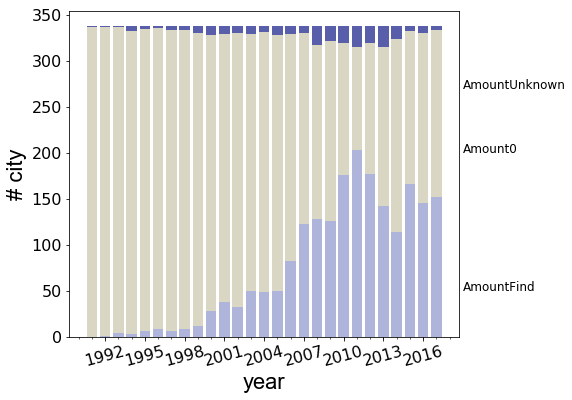

In [19]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(1,1,1)
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size' : 22,
}###设置横纵坐标的字体格式
plt.xlabel('year',font2)
plt.ylabel('# city',font2)
plt.tick_params(labelsize=16) #刻度字体大小13

x = np.arange(1991,2018)
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.xticks(rotation=15)
for i in range(27):
    plt.bar(x,AmountFind, zorder=4,color='#afb4db') 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] for i in range(len(AmountUnknown))], zorder=3,color='#d9d6c3') 
    plt.bar(x,[AmountFind[i] + AmountUnknown[i] +Amount0[i] for i in range(27)], zorder=2,color='#585eaa') 
plt.text(2019,50,'AmountFind',fontsize = 12)
plt.text(2019,200,'Amount0',fontsize = 12)
plt.text(2019,270,'AmountUnknown',fontsize = 12)
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6c(amount).pdf', bbox_inches='tight')
plt.show()

In [7]:
data['City'][0]

'七台河'

In [8]:
######## 投资金额存在的城市累加 ####

In [9]:
data.iloc[0:1,2:2+27]

,1991总投资金额(M),1992总投资金额(M),1993总投资金额(M),1994总投资金额(M),1995总投资金额(M),1996总投资金额(M),1997总投资金额(M),1998总投资金额(M),1999总投资金额(M),2000总投资金额(M),...,2008总投资金额(M),2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataAmount = data.iloc[:,2:2+27] ###amount
city = data['City']
cityall = []
AmountFind = []
Amount0 = []
AmountUnknown = []
for i in dataAmount.columns:
    amountFind = 0
    amount0 = 0
    amountUnknown = 0
    cityF = [] ###记录该年有投资的城市
    for j in range(dataAmount.shape[0]):
        if dataAmount[i][j] > 0:
            cityF.append(city[j]) ### 将该年有投资的城市
    cityall.append(cityF)

In [11]:
cityNum = []
city2 = list(set(cityall[0]).union(set(cityall[1])))
cityNum.append(len(cityall[0]))
cityNum.append(len(city2))
for i in range(2,27):   
    city1 = cityall[i]
    city2 = list(set(city1).union(set(city2)))
    cityNum.append(len(city2))

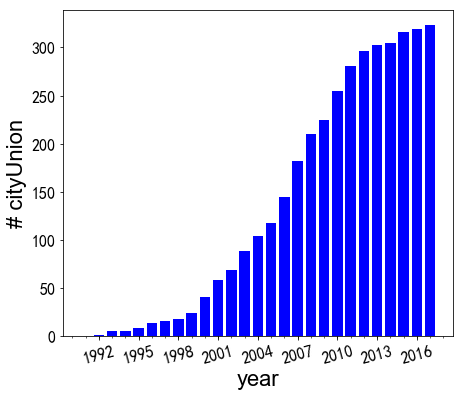

In [12]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# cityUnion',font2)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
for i in range(27):
    plt.bar(x,cityNum,color = 'b') 
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6c2(amountunion).pdf', bbox_inches='tight')
plt.show()

In [13]:
###### pop和投资都存在的城市数####

In [14]:
datavc = pd.read_excel('E:/vcdata/data/ALL_Intersection.xlsx') ###GDP ！= null

In [15]:
datavc.iloc[0:1,12:12+18] 

,2000总投资金额(M),2001总投资金额(M),2002总投资金额(M),2003总投资金额(M),2004总投资金额(M),2005总投资金额(M),2006总投资金额(M),2007总投资金额(M),2008总投资金额(M),2009总投资金额(M),2010总投资金额(M),2011总投资金额(M),2012总投资金额(M),2013总投资金额(M),2014总投资金额(M),2015总投资金额(M),2016总投资金额(M),2017总投资金额(M)
0,NaN,NaN,NaN,NaN,NaN,NaN,8.72638,NaN,NaN,463.6,NaN,600.0,NaN,0.0,NaN,NaN,43.6,NaN


In [16]:
dataAmount = datavc.iloc[:,12:12+18] ###amount
dataPOP = datavc.iloc[:,3+27*5:21+27*5] ### pop 
APFind = []
AP0 = []
APUnknown = []
c1 = dataAmount.columns
c2 = dataPOP.columns
for i in range(len(dataAmount.columns)):
    amountFind = 0
    amount0 = 0
    amountUnknown = 0
    for j in range(dataAmount.shape[0]):
        if dataAmount[c1[i]][j] > 0 and dataPOP[c2[i]][j] > 0:
            amountFind += 1 ###人口和投资都存在
        elif dataAmount[c1[i]][j] == 0 or dataPOP[c2[i]][j] == 0:
            amount0 += 1
        else:
            amountUnknown += 1
    APFind.append(amountFind)
    AP0.append(amount0)
    APUnknown.append(amountUnknown)

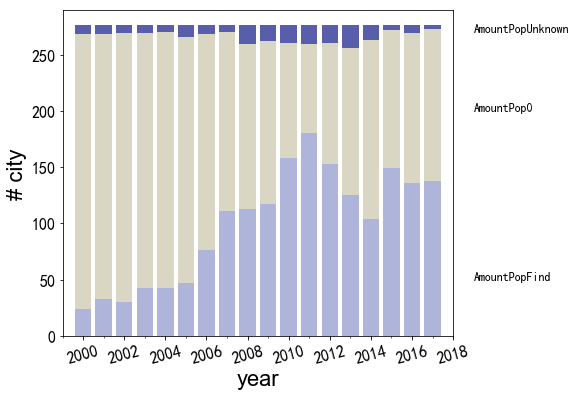

In [20]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# city',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(2000,2018)
plt.xlim(1999,2018)
for i in range(27):
    plt.bar(x,APFind, zorder=4,color='#afb4db') 
    plt.bar(x,[APFind[i] + APUnknown[i] for i in range(len(APUnknown))], zorder=3,color='#d9d6c3') 
    plt.bar(x,[APFind[i] + APUnknown[i] +AP0[i] for i in range(18)], zorder=2,color='#585eaa') 
plt.text(2019,50,'AmountPopFind',fontsize = 12)
plt.text(2019,200,'AmountPop0',fontsize = 12)
plt.text(2019,270,'AmountPopUnknown',fontsize = 12)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6d(amount&pop).pdf', bbox_inches='tight')
plt.show()

In [19]:
######累积

In [21]:
dataAmount = datavc.iloc[:,12:12+18] ###amount
dataPOP = datavc.iloc[:,3+27*5:21+27*5] ### pop 
cityvc = datavc['City']
cityvcall = []
c1 = dataAmount.columns
c2 = dataPOP.columns
for i in range(len(dataAmount.columns)):
    cityvcY = [] ###保存该年投资和人口都存在的城市
    for j in range(dataAmount.shape[0]):
        if dataAmount[c1[i]][j] > 0 and dataPOP[c2[i]][j] > 0:
            cityvcY.append(cityvc[j]) ###人口和投资都存在
    cityvcall.append(cityvcY)

In [22]:
cityNumV = []
city2 = list(set(cityvcall[0]).union(set(cityvcall[1])))
cityNumV.append(len(cityvcall[0]))
cityNumV.append(len(city2))
for i in range(2,18):   
    city1 = cityvcall[i]
    city2 = list(set(city1).union(set(city2)))
    cityNumV.append(len(city2))

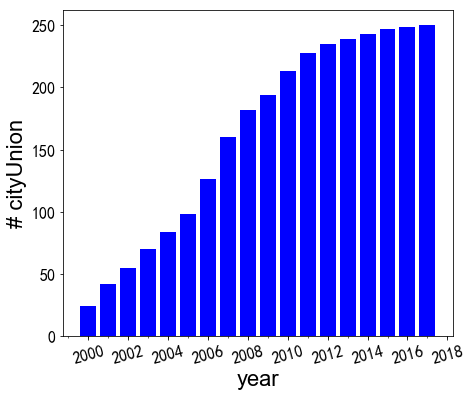

In [22]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# cityUnion',font2)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(2)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(2000,2018)
for i in range(18):
    plt.bar(x,cityNumV,color = 'b') 
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6d2(amounPoptunion).pdf', bbox_inches='tight')
plt.show()

In [23]:
########## # investments ###############

In [24]:
data.iloc[0:1,2+27*3:2+27*4]

,1991投资次数(无金额),1992投资次数(无金额),1993投资次数(无金额),1994投资次数(无金额),1995投资次数(无金额),1996投资次数(无金额),1997投资次数(无金额),1998投资次数(无金额),1999投资次数(无金额),2000投资次数(无金额),...,2008投资次数(无金额),2009投资次数(无金额),2010投资次数(无金额),2011投资次数(无金额),2012投资次数(无金额),2013投资次数(无金额),2014投资次数(无金额),2015投资次数(无金额),2016投资次数(无金额),2017投资次数(无金额)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dataTimes = data.iloc[:,2+27:2+27*2] 
dataUnknown = data.iloc[:,2+27*2:2+27*3] 
dataTimes0 = data.iloc[:,2+27*3:2+27*4] 
TimesFind = dataTimes.sum(axis=0)
Times0 = dataTimes0.sum(axis=0)
TimesUnknown = dataUnknown.sum(axis=0)

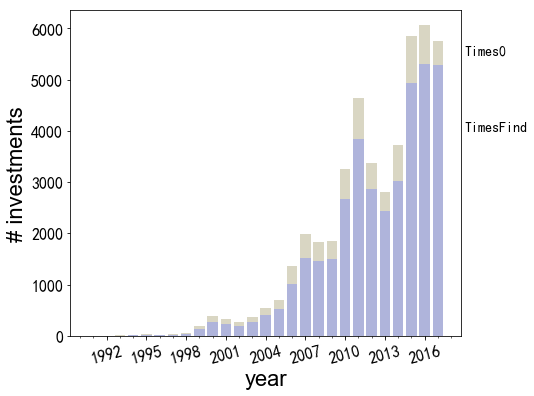

In [24]:
fig = plt.figure(figsize=(7,6))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# investments',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
# plt.xlim(1999,2018)
for i in range(27):
    plt.bar(x,TimesFind, zorder=4,color='#afb4db') 
#     plt.bar(x,[TimesFind[i] + TimesUnknown[i] for i in range(len(TimesUnknown))], zorder=3) '#585eaa'
    plt.bar(x,[TimesFind[i] +Times0[i] for i in range(27)], zorder=2,color='#d9d6c3') 
plt.text(2019,4000,'TimesFind',fontsize = 14)
plt.text(2019,5500,'Times0',fontsize = 14)
# plt.text(1992,9000,'TimesUnknown',fontsize = 14)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6e(times).pdf', bbox_inches='tight')
plt.show()

In [25]:
######## 276个城市投资次数为0和不为0的分布情况 ###

In [26]:
datavc.iloc[0:1,3+27:3+27*2]

,1991总投资次数,1992总投资次数,1993总投资次数,1994总投资次数,1995总投资次数,1996总投资次数,1997总投资次数,1998总投资次数,1999总投资次数,2000总投资次数,...,2008总投资次数,2009总投资次数,2010总投资次数,2011总投资次数,2012总投资次数,2013总投资次数,2014总投资次数,2015总投资次数,2016总投资次数,2017总投资次数
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,3.0,0.0,1.0,0.0,0.0,3.0,0.0


In [27]:
dataTimes = datavc.iloc[:,3+27:3+27*2]###times
TFind = []
T0 = []
c1 = dataTimes.columns
cityvc = datavc['City']
cityvcall = []
for i in range(len(dataTimes.columns)):
    timesFind = 0
    times0 = 0
    cityvcY = [] ###保存该年投资和人口都存在的城市
    for j in range(dataTimes.shape[0]):
        if dataTimes[c1[i]][j] > 0:
            timesFind += 1 ###投资次数不为0
            cityvcY.append(cityvc[j]) ###人口和投资都存在
        else:
            times0 += 1
    TFind.append(timesFind)
    T0.append(times0)
    cityvcall.append(cityvcY)

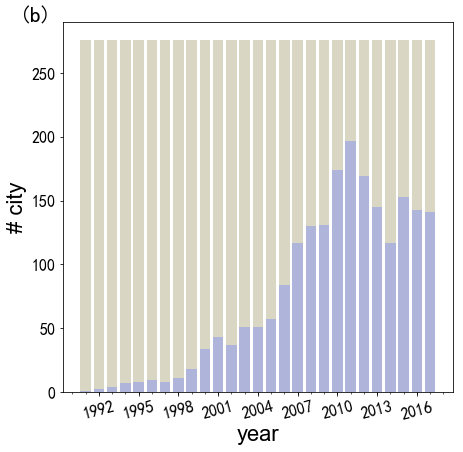

In [28]:
fig = plt.figure(figsize=(7,6.8))
ax1 = fig.add_subplot(1,1,1)
plt.xlabel('year',font2)
plt.ylabel('# city',font2)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
# plt.xlim(1991,2018)
for i in range(27):
    plt.bar(x,TFind, zorder=4,color='#afb4db') 
    plt.bar(x,[TFind[i] + T0[i] for i in range(27)], zorder=2,color='#d9d6c3') 
# plt.text(2019,50,'TimesFind',fontsize = 12)
# plt.text(2019,200,'Times0',fontsize = 12)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.text(1990-4,290,'(b)',fontsize=22)
# plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6e(times).pdf', bbox_inches='tight')
plt.savefig('E:/0论文/1picture/2_6b.png',dpi=500, bbox_inches='tight')
plt.show()

In [29]:
### 累积 #######
cityNumT = []
city2 = list(set(cityvcall[0]).union(set(cityvcall[1])))
cityNumT.append(len(cityvcall[0]))
cityNumT.append(len(city2))
for i in range(2,27):   
    city1 = cityvcall[i]
    city2 = list(set(city1).union(set(city2)))
    cityNumT.append(len(city2))

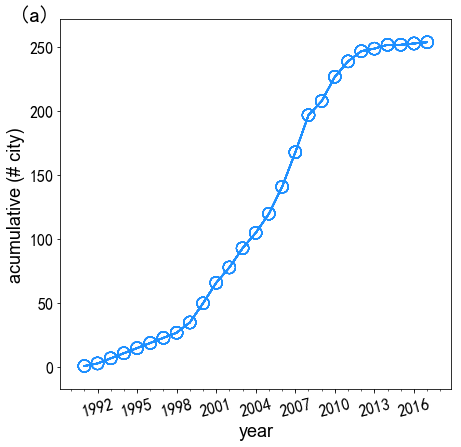

In [30]:
fig = plt.figure(figsize=(7,6.8))
ax1 = fig.add_subplot(1,1,1)
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 18,
    }###设置横纵坐标的字体格式
plt.xlabel('year',font2)
plt.ylabel('acumulative (# city)',font2)
plt.xticks(rotation=15)
plt.rcParams['font.sans-serif']=['Simhei']     #解决中文显示问题，目前只知道黑体可行
plt.rcParams['axes.unicode_minus']=False       #解决负数坐标显示问题
xmajorLocator = MultipleLocator(3)
xminorLocator = MultipleLocator(1.0)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
plt.tick_params(labelsize=16) #刻度字体大小13
x = np.arange(1991,2018)
for i in range(27):
    plt.plot(x,cityNumT,color='dodgerblue')
    plt.scatter(x,cityNumT, color='', marker='o', edgecolors='dodgerblue', s=150) # 把 corlor 设置为空，通过edgecolors来控制颜色
# plt.savefig('E:/vcdata/pic/picSCLaw/Supplementary Fig6e22(timesUnion).pdf', bbox_inches='tight')
plt.text(1990-4,270,'(a)',fontsize=22)
plt.savefig('E:/0论文/1picture/2_6a.png',dpi=500, bbox_inches='tight')
plt.show()